# CVEfixes Dataset Processing

In [ ]:
!wget https://zenodo.org/records/13118970/files/CVEfixes_v1.0.8.zip
!unzip CVEfixes_v1.0.8.zip
%cd CVEfixes_v1.0.8/Data

--2025-05-16 01:38:21--  https://zenodo.org/records/13118970/files/CVEfixes_v1.0.8.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708711268 (12G) [application/octet-stream]
Saving to: ‘CVEfixes_v1.0.8.zip’

CVEfixes_v1.0.8.zip 100%[===================>]  11.83G  18.1MB/s    in 10m 28s 

2025-05-16 01:48:50 (19.3 MB/s) - ‘CVEfixes_v1.0.8.zip’ saved [12708711268/12708711268]

Archive:  CVEfixes_v1.0.8.zip
   creating: CVEfixes_v1.0.8/
  inflating: CVEfixes_v1.0.8/INSTALL.md  
  inflating: CVEfixes_v1.0.8/README.md  
   creating: CVEfixes_v1.0.8/Examples/
  inflating: CVEfixes_v1.0.8/Examples/query_CVEfixes.ipynb  
   creating: CVEfixes_v1.0.8/Doc/
  inflating: CVEfixes_v1.0.8/Doc/DataDictionary.md  
  inflating: CVEfixes_v1.0.8/Doc/ER_diagram.png  
  inflating: CVEfixes_v1.0.8/Doc/Bhandari-Naseer-Moonen_-_CVEfixes.pdf 

In [ ]:
# @title Previous Unzipping (Deprecated)
# !gunzip CVEfixes_v1.0.8.log.gz
# !gunzip CVEfixes_v1.0.8.sql.gz

# import subprocess

# # Run the zcat command and capture its output
# result = subprocess.check_output(['zcat', 'CVEfixes_v1.0.8.sql.gz'], text=True)

# !zcat CVEfixes_v1.0.8.sql.gz | head -n 1000 > first_100_lines.sql

In [ ]:
# @title Previous Unzipping Right
# !zcat CVEfixes_v1.0.8.sql.gz | grep -i "cwe_classification" > cve_cwe_map.sql

# !zcat CVEfixes_v1.0.8.sql.gz | grep -E 'INSERT INTO repository.*Python' > python_repos.sql

# !zcat CVEfixes_v1.0.8.sql.gz | grep -E 'INSERT INTO fixes.*github\.com/(django/django|pallets/flask|psf/requests|numpy/numpy|pandas-dev/pandas|pytorch/pytorch|tensorflow/tensorflow)' > python_fixes.sql

In [ ]:
!git clone https://github.com/Omar-Elsendiony/Static_Tool_Analysis_RP.git

Cloning into 'Static_Tool_Analysis_RP'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 59 (delta 24), reused 45 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 930.07 KiB | 2.87 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
# @title Get CVSS for Python repos
import gzip
import subprocess
import json

with open("Static_Tool_Analysis_RP/repos_fixes/filtered_fixes.json", "r") as f:
    data = json.load(f)

cve_ids = [item[0] for item in data]
# print(cve_ids[:13])

grep_pattern = 'INSERT INTO cve.*(' + '|'.join(cve_ids) + ')'
# print(grep_pattern[:250])

# raise Exception
command = f"zcat CVEfixes_v1.0.8.sql.gz | grep -E '{grep_pattern}' > python_vul_scores.sql"


try:
    subprocess.run(command, shell=True, check=True)
    print("Output written to python_vul_scores.sql")
except subprocess.CalledProcessError as e:
    print(f"Error executing command: {e}")
    print(f"Stderr: {e.stderr}")
except FileNotFoundError:
    print("Error: CVEfixes_v1.0.8.sql.gz not found.")

Output written to python_vul_scores.sql


In [ ]:
# @title Get the fixes rows for the python repos (cve_id, git_hub_url, ...)
# import gzip
# import subprocess

# # repositories = [
# #     "django/django",
# #     "pallets/flask",
# #     "psf/requests",
# #     "numpy/numpy",
# #     "pandas-dev/pandas",
# #     "pytorch/pytorch",
# #     "tensorflow/tensorflow",
# # ]
# import json

# with open("Static_Tool_Analysis_RP/repos_metadata/repos.json", "r") as f:
#     data = json.load(f)

# repositories = [item[1] for item in data]
# # print(repo_names)


# grep_pattern = 'INSERT INTO fixes.*github\\.com/(' + '|'.join(map(lambda repo: repo.replace("/", "\\/"), repositories)) + ')'
# command = f"zcat CVEfixes_v1.0.8.sql.gz | grep -E '{grep_pattern}' > python_fixes.sql"

# try:
#     subprocess.run(command, shell=True, check=True)
#     print("Output written to python_fixes.sql")

# except subprocess.CalledProcessError as e:
#     print(f"Error executing command: {e}")
#     print(f"Stderr: {e.stderr}")
# except FileNotFoundError:
#     print("Error: CVEfixes_v1.0.8.sql.gz not found.")

Output written to python_fixes.sql


# Process Golden Truth From Dataset into a JSON file

In [ ]:
!git clone https://github.com/Omar-Elsendiony/Golden_Truth_1.git

Cloning into 'Golden_Truth_1'...
remote: Enumerating objects: 4304, done.
remote: Counting objects: 100% (4304/4304), done.
remote: Compressing objects: 100% (2294/2294), done.
remote: Total 4304 (delta 217), reused 4301 (delta 217), pack-reused 0 (from 0)
Receiving objects: 100% (4304/4304), 5.61 MiB | 12.36 MiB/s, done.
Resolving deltas: 100% (217/217), done.


In [ ]:
%cd Golden_Truth_1/

/content/Golden_Truth_1


In [ ]:
paths = list_cve_examples(".")

In [ ]:
print(paths[:5])

['./zenml/f863fde', './zenml/68bcb3b', './zenml/21edd86', './zenml/afcaf74', './zenml/58cb3d9']


In [ ]:
%cd Golden_Truth_1/

/content/Golden_Truth_1


In [ ]:
import json

golden_truth_json = dict()
for path in paths:
  with open(os.path.join(path, "golden_truth.json"), 'r') as f:
    data = json.load(f)
  golden_truth_json[path[2:]] = data

In [ ]:
with open("golden_truth.json", 'w') as f:
  json.dump(golden_truth_json, f, indent=4)

# Safe vs Vulnerable Code Extraction

## Semgrep Vulnerability Detection Running And Formatting

In [11]:
!pip install -qqq semgrep

^C


In [2]:
!SEMGREP_APP_TOKEN=9b406a28d622e32038a9595684cf3d355d23a620ea5b9d7bbd5236cf46f57e6f semgrep login

/bin/bash: line 1: semgrep: command not found


In [3]:
!git clone https://github.com/Omar-Elsendiony/Research_Testing_1.git

Cloning into 'Research_Testing_1'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (41/41), done.
^C


In [4]:
%cd Research_Testing_1/

[Errno 2] No such file or directory: 'Research_Testing_1/'
/content


In [5]:
!unzip "repos_vulnerability_analysis (1).zip" -d repos_vulnerability_analysis

unzip:  cannot find or open repos_vulnerability_analysis (1).zip, repos_vulnerability_analysis (1).zip.zip or repos_vulnerability_analysis (1).zip.ZIP.


In [6]:
%cd repos_vulnerability_analysis/repos_vulnerability_analysis/

[Errno 2] No such file or directory: 'repos_vulnerability_analysis/repos_vulnerability_analysis/'
/content


In [7]:
!pwd

/content


In [8]:
!semgrep ci --json --json-output=semgrep_vulnerability.json

/bin/bash: line 1: semgrep: command not found


In [9]:
# !semgrep ci --json --json-output=semgrep_synth.json

In [10]:
# @title Get SemGrep Detected CWES
import json

with open('semgrep_vulnerability.json', 'r') as f:
    data = json.load(f)

with open('cwe_pillar_mapping.json', 'r') as f:
    cwe_pillar_mapping = json.load(f)

results = data['results']
# print(len(results))

results_json = dict()


for result in results:
  cases_cwes = dict()
  # print(result['path'])
  file_path = result['path']
  cve_example = '/'.join(file_path.split('/')[:-2])
  if results_json.get(cve_example) is None:
    results_json.update({cve_example: {"detected_files_meta_data": list()}})

  cases_cwes['file_path'] = file_path
  cases_cwes['impact'] = result['extra']['metadata'].get('impact', None)
  cases_cwes['likelihood'] = result['extra']['metadata'].get('likelihood', None)
  cases_cwes['severity'] = result['extra']['severity']
  cases_cwes['cwes'] = []

  try:
    cwes = result['extra']['metadata']['cwe']
    if isinstance(cwes, str):
        cases_cwes['cwes'].append(cwes.split(":")[0])
    else:
      for cwe in cwes:
        pure_cwe = cwe.split(":")[0]
        cases_cwes['cwes'].append(pure_cwe)
  except:
    pass


  results_json[cve_example]["detected_files_meta_data"].append(cases_cwes)


for path in data['paths']['scanned']:
  cve_example = '/'.join(path.split('/')[:-2])
  # print(cve_example)
  if results_json.get(cve_example) is None:
    results_json.update({cve_example: {"detected_files_meta_data": list()}})


with open('semgrep_formatted_output.json', 'w') as f:
    json.dump(results_json, f, indent=4)


FileNotFoundError: [Errno 2] No such file or directory: 'semgrep_vulnerability.json'

In [ ]:
# @title Connect to Google Drive
from google.colab import drive

drive.mount('/content/drive')

## Process SAST tools Outputs

In [1]:
!gdown --id 162EGu43p9Zlr3uoRUfMpVOzwmJfzs7oG # Repo Files that contain the vulnerabilities

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=162EGu43p9Zlr3uoRUfMpVOzwmJfzs7oG
To: /content/repos_vulnerability_analysis.zip
100% 7.33M/7.33M [00:00<00:00, 21.7MB/s]


In [2]:
!unzip repos_vulnerability_analysis.zip

Archive:  repos_vulnerability_analysis.zip
   creating: repos_vulnerability_analysis/
   creating: repos_vulnerability_analysis/calibre/
   creating: repos_vulnerability_analysis/calibre/aeb5b03/
   creating: repos_vulnerability_analysis/calibre/aeb5b03/files/
  inflating: repos_vulnerability_analysis/calibre/aeb5b03/files/edit_metadata.pyj  
  inflating: repos_vulnerability_analysis/calibre/aeb5b03/files/code.py  
  inflating: repos_vulnerability_analysis/calibre/aeb5b03/files/bookmarkmanager.py  
   creating: repos_vulnerability_analysis/vyper/
   creating: repos_vulnerability_analysis/vyper/2c73f83/
   creating: repos_vulnerability_analysis/vyper/2c73f83/files/
  inflating: repos_vulnerability_analysis/vyper/2c73f83/files/core.py  
  inflating: repos_vulnerability_analysis/vyper/2c73f83/files/expr.py  
  inflating: repos_vulnerability_analysis/vyper/2c73f83/files/test_slice.py  
  inflating: repos_vulnerability_analysis/vyper/2c73f83/files/test_string.py  
  inflating: repos_vulnera

In [3]:
%cd repos_vulnerability_analysis/

/content/repos_vulnerability_analysis


In [4]:
# @title Get all the examples by traversing all the directories that resemble the CVE examples

import os

def get_concatenated_directory_names(root_path):
    """
    Returns a list of strings where each string is the concatenation of a
    first-level directory name and a second-level directory name.

    Example output:
    ['dir1_subdir1', 'dir1_subdir2', 'dir2_subdir1', 'dir2_subdir3']
    """
    concatenated_names = []

    # List all first-level directories
    for first_level in os.listdir(root_path):
        first_level_path = os.path.join(root_path, first_level)

        # Skip if not a directory
        if not os.path.isdir(first_level_path):
            continue

        # List all second-level directories
        for second_level in os.listdir(first_level_path):
            second_level_path = os.path.join(first_level_path, second_level)

            # Skip if not a directory
            if not os.path.isdir(second_level_path):
                continue

            # Concatenate the directory names
            concatenated_name = f"{first_level}/{second_level}"
            concatenated_names.append(concatenated_name)

    return concatenated_names

# Example usage
if __name__ == "__main__":
    root_directory = "."  # Change this to the path of your root directory

    all_examples = get_concatenated_directory_names(root_directory)

    print(f"Found {len(all_examples)} concatenated directory names")
    # for name in all_examples:
    #     print(name)

Found 505 concatenated directory names


In [5]:
!gdown --id 1IRSYohsxOWV5Kqy6fLbALEHXtBgNnfpy # Bandit
!gdown --id 1ASBnC_euVQag1CqjD45lV3lhfX_xdV-x # Sonar
!gdown --id 1ZbN4DxVv1zKB_iabm6wUzBYLv9efyT2W # CodeQL
!gdown --id 1rzQc21ysLVcmstx56H2Pdw54k3aX6vyZ # Coverity
!gdown --id 1qNiaNjUeyfoX1ucw6m24y9zjgoGXuxpS # HoruSec
!gdown --id 1d_CY84KBYdqwrx49OrOo-FwcwUUb7fDQ # SemGrep

# https://drive.google.com/file/d/1qNiaNjUeyfoX1ucw6m24y9zjgoGXuxpS/view?usp=sharing

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IRSYohsxOWV5Kqy6fLbALEHXtBgNnfpy
To: /content/repos_vulnerability_analysis/transformed_bandit.json
100% 1.49M/1.49M [00:00<00:00, 51.3MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ASBnC_euVQag1CqjD45lV3lhfX_xdV-x
To: /content/repos_vulnerability_analysis/transformed_sonar_issues.json
100% 157k/157k [00:00<00:00, 58.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need t

In [6]:
# @title Reading SAST TOOLS Formatted Output
import json

with open("transformed_bandit.json", 'r') as f:
    transformed_bandit = json.load(f)
print(len(transformed_bandit.keys()))

with open("transformed_sonar_issues.json", 'r') as f:
    transformed_sonar = json.load(f)
print(len(transformed_sonar.keys()))

with open("codeql_transformed_github_alerts.json", 'r') as f:
    transformed_code_ql = json.load(f)
print(len(transformed_code_ql.keys()))

with open("formatted_coverity_issues.json", 'r') as f:
    transformed_coverity = json.load(f)
print(len(transformed_coverity.keys()))

with open("formatted_horusec_issues.json", 'r') as f:
    transformed_horusec = json.load(f)
print(len(transformed_horusec.keys()))

with open('semgrep_formatted_output.json', 'r') as f:
  transformed_semgrep = json.load(f)
print(len(transformed_semgrep.keys()))

# 250
# 15
# 89
# 95
# 112

250
15
89
95
112
500


In [7]:
def formatted_tool_output(tool_output):
  number_not_detected = 0
  for ex in all_examples:
      # print(ex)
      if (ex not in tool_output):
          number_not_detected += 1
          tool_output[ex] = {"detected_files_meta_data": list()}
  print(number_not_detected)

formatted_tool_output(transformed_bandit)
formatted_tool_output(transformed_sonar)
formatted_tool_output(transformed_code_ql)
formatted_tool_output(transformed_coverity)
formatted_tool_output(transformed_horusec)
formatted_tool_output(transformed_semgrep)

255
490
416
410
393
5


In [8]:
print(len(transformed_semgrep))

505


In [9]:
def remove_empty_directories_from_analysis(formatted_tool_output):

  empty_directories = ['Pillow/ae453aa', 'Pillow/893a408', 'zenml/68bcb3b', 'zenml/21edd86', 'authentik/2618790']

  for e in empty_directories:
    formatted_tool_output.pop(e)

  print(len(formatted_tool_output))

In [10]:
remove_empty_directories_from_analysis(transformed_bandit)
remove_empty_directories_from_analysis(transformed_sonar)
remove_empty_directories_from_analysis(transformed_code_ql)
remove_empty_directories_from_analysis(transformed_coverity)
remove_empty_directories_from_analysis(transformed_horusec)
remove_empty_directories_from_analysis(transformed_semgrep)

500
500
500
500
500
500


### GET CWE CLASS and DETECTED VULNERABLE

In [11]:
!gdown --id 1D7eY2t38zY-kuxIWgHazXwfXG1ZhAkWx # Golden Truth
!gdown --id 1-gvrE-80NNCeC7lUmb7LGsmbsF2x2YZR # CVE_CWE_MAPPING

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D7eY2t38zY-kuxIWgHazXwfXG1ZhAkWx
To: /content/repos_vulnerability_analysis/golden_truth.json
100% 89.4k/89.4k [00:00<00:00, 96.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-gvrE-80NNCeC7lUmb7LGsmbsF2x2YZR
To: /content/repos_vulnerability_analysis/cwe_pillar_mapping.json
100% 25.3k/25.3k [00:00<00:00, 43.4MB/s]


In [12]:
# Deprecated/Prohibited CWEs
bad_cwes = {"CWE-21", "CWE-264", "CWE-254", "CWE-255", "CWE-310", "CWE-19", "CWE-534", "CWE-730", "CWE-398"}

In [13]:
# @title Mapping from CWE to pillar
with open("cwe_pillar_mapping.json") as f:
  cwe_pillar_mapping = json.load(f)

pillars_set = set()

for _, pillar in cwe_pillar_mapping.items():
  pillars_set.add(pillar)

for pillar in pillars_set:
  cwe_pillar_mapping.update({pillar: pillar})

In [14]:
print(pillars_set)

{'CWE-284', 'CWE-664', 'CWE-710', 'CWE-691', 'CWE-693', 'CWE-703', 'CWE-682', 'CWE-435', 'CWE-697', 'CWE-707'}


In [15]:
# @title Vulnerability Detection with Test files
import json

def extract_pillar_detection_and_vulnerability(static_tool_cases):
  # global golden_truth_pillar_analytics
  with open("golden_truth.json") as f:
    golden_truth = json.load(f)

  total_examples = 0
  detected_vulnerable = 0
  detected_wrong_pillar = 0 # false positive
  detected_right_pillar = 0

  ground_truth_pillar_analytics = dict()
  static_tool_pillar_analytics = dict()
  for pillar in pillars_set:
    ground_truth_pillar_analytics.update({pillar: 0})
    static_tool_pillar_analytics.update({pillar: 0})

  for ex_name, ex_metadata in static_tool_cases.items():
    golden_truth_ex = golden_truth[ex_name]['cwe_id']
    golden_truth_ex_pillar = set()

    # in_bad_cwes = False
    for cwe in golden_truth_ex:
      if (cwe not in bad_cwes):
        golden_truth_ex_pillar.add(cwe_pillar_mapping[cwe])
        ground_truth_pillar_analytics[cwe_pillar_mapping[cwe]] += 1
      # else:
      #   print(cwe)
      #   in_bad_cwes = True
      #   break
    # if (in_bad_cwes):
    #   print(golden_truth_ex_pillar)
    #   raise Exception

    # print(golden_truth_ex_pillar
    if (golden_truth_ex_pillar == set()):
      continue

    found_vulnerable_files = ex_metadata["detected_files_meta_data"]
    if (found_vulnerable_files == []):
      # not_detected_vulnerable += 1
      total_examples += 1
      continue
    else:
      detected_files = False
      for found_vulnerable_file in found_vulnerable_files:
        file_cwes = found_vulnerable_file["cwes"]
        if (file_cwes == []):
          continue

        detected_files = True
        # found_at_least_one_vulnerability = False
        # print(file_cwes)
        # if (len(file_cwes) > 1): raise Exception
        for file_cwe in file_cwes:
          file_cwe_splitted_list = file_cwe.split('-')
          cwe_number = file_cwe_splitted_list[1]
          i = 0
          while cwe_number[i] == '0':
            i += 1
          cwe_number = cwe_number[i:]
          file_cwe = 'CWE-' + cwe_number
          if file_cwe in bad_cwes:
            continue
          if (cwe_pillar_mapping[file_cwe] in golden_truth_ex_pillar):
              golden_truth_ex_pillar.remove(cwe_pillar_mapping[file_cwe]) # remove to detect the others
              static_tool_pillar_analytics[cwe_pillar_mapping[file_cwe]] += 1
              detected_right_pillar += 1
              # found_at_least_one_vulnerability = True
          else:
            detected_wrong_pillar += 1

      if detected_files:
        detected_vulnerable += 1

      # if golden_truth_ex_pillar == set():
      #   detected_all_cwe_pillars += 1

      total_examples += 1

  precision = (detected_right_pillar / (detected_right_pillar + detected_wrong_pillar)) * 100
  recall = (detected_right_pillar / total_examples)*100

  print(f"Detected Vulnerabilities: {detected_vulnerable}")
  print(f"Detected Wrong Pillar (false positive): {detected_wrong_pillar}")
  print(f"Detected Right Pillar (true positive): {detected_right_pillar}")
  print(f"Not detected but should be (false negative): {total_examples - detected_right_pillar}")
  print(f"Total Examples: {total_examples}")

  print(f"precision: {(precision)}%")
  print(f"recall: {(recall)}%")
  print(f"f1 score: {((2 * precision * recall)/ (precision + recall))}%")
  # print(f"Ground Truth Pillar Analytics: {ground_truth_pillar_analytics}")
  # print(f"Static Tool Pillar Analytics: {static_tool_pillar_analytics}")
  # print(detected_vulnerable, total_examples, detected_all_cwe_pillars)
  return ground_truth_pillar_analytics, static_tool_pillar_analytics

static_tool_cases = transformed_semgrep
extract_pillar_detection_and_vulnerability(static_tool_cases)

Detected Vulnerabilities: 228
Detected Wrong Pillar (false positive): 1199
Detected Right Pillar (true positive): 141
Not detected but should be (false negative): 333
Total Examples: 474
precision: 10.522388059701493%
recall: 29.746835443037973%
f1 score: 15.545755237045206%


({'CWE-284': 69,
  'CWE-664': 202,
  'CWE-710': 2,
  'CWE-691': 17,
  'CWE-693': 30,
  'CWE-703': 3,
  'CWE-682': 4,
  'CWE-435': 9,
  'CWE-697': 3,
  'CWE-707': 156},
 {'CWE-284': 13,
  'CWE-664': 60,
  'CWE-710': 0,
  'CWE-691': 0,
  'CWE-693': 6,
  'CWE-703': 0,
  'CWE-682': 0,
  'CWE-435': 0,
  'CWE-697': 0,
  'CWE-707': 62})

In [16]:
# print((ground_truth_pillar_analytics))

In [17]:
# @title Remove Test files from folders
import os

def remove_test_files(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if 'test' in filename.lower():
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)
                    print(f"Removed: {file_path}")
                except Exception as e:
                    print(f"Failed to remove {file_path}: {e}")
remove_test_files(".")

Removed: ./weblate/abe0d2a/files/test_registration.py
Removed: ./weblate/22d577b/files/test_reports.py
Removed: ./tornado/1c36307/files/web_test.py
Removed: ./tornado/1c36307/files/websocket_test.py
Removed: ./requests/74ea7cf/files/test_requests.py
Removed: ./django-rest-framework/4bb9a3c/files/test_templatetags.py
Removed: ./RestrictedPython/4134aed/files/test_Utilities.py
Removed: ./RestrictedPython/4134aed/files/test_Guards.py
Removed: ./RestrictedPython/4134aed/files/test_utilities.py
Removed: ./odoo-web-progress/3c867f1/files/test_web_progress.py
Removed: ./turbogears/f68bbab/files/test_controllers.py
Removed: ./keylime/e429e95/files/test_validators.py
Removed: ./scikit-learn/70ca21f/files/test_text.py
Removed: ./opcua-asyncio/2be7ce8/files/test_crypto_connect.py
Removed: ./opcua-asyncio/f6603da/files/test_connections.py
Removed: ./fides/f526d9f/files/test_api_router.py
Removed: ./fides/8beaace/files/test_unsafe_file_util.py
Removed: ./fides/5989b5f/files/test_saas_config_endpoin

In [18]:
import os

def find_empty_folders(root_dir):
    empty_folders = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        # Check if the folder is empty (no files and no subdirectories)
        if not dirnames and not filenames:
            empty_folders.append(dirpath)
    return empty_folders
folders_include_tests_only = find_empty_folders(".")

In [19]:
print(folders_include_tests_only)

['./opcua-asyncio/2be7ce8/files', './django-user-sessions/f0c4077/files', './lxml/86368e9/files', './Pillow/893a408/files', './Pillow/bb6c11f/files', './Pillow/ae453aa/files', './flask-session-captcha/2811ae2/files', './zenml/68bcb3b/files', './zenml/21edd86/files', './authentik/2618790/files', './django-photologue/960cb06/files', './onnx/f369b0e/files']


In [20]:
print(type(transformed_semgrep))

<class 'dict'>


In [21]:
def remove_only_test_examples(static_tool):
  for folder in folders_include_tests_only:
    folder = folder[2:-6]
    # print(folder)
    if folder in static_tool:
      static_tool.pop(folder)
  print(len(static_tool))

remove_only_test_examples(transformed_semgrep)
remove_only_test_examples(transformed_bandit)
remove_only_test_examples(transformed_sonar)
remove_only_test_examples(transformed_code_ql)
remove_only_test_examples(transformed_coverity)
remove_only_test_examples(transformed_horusec)

493
493
493
493
493
493


In [25]:
# @title Analytics with test files (Last)
import json

# Removed only test files from the cases, then checked only non-test files

def extract_pillar_detection_and_vulnerability(static_tool_cases):
  # global golden_truth_pillar_analytics
  with open("golden_truth.json") as f:
    golden_truth = json.load(f)

  total_examples = 0
  total_cwe_pillars = 0
  detected_vulnerable = 0
  detected_wrong_pillar = 0 # false positive
  detected_right_pillar = 0

  ground_truth_pillar_analytics = dict()
  static_tool_pillar_analytics = dict()
  static_tool_pillar_wrong_analytics = dict()
  for pillar in pillars_set:
    ground_truth_pillar_analytics.update({pillar: 0})
    static_tool_pillar_analytics.update({pillar: 0})
    static_tool_pillar_wrong_analytics.update({pillar:0})

  for ex_name, ex_metadata in static_tool_cases.items():
    golden_truth_ex = golden_truth[ex_name]['cwe_id']
    golden_truth_ex_pillar = set()

    # in_bad_cwes = False
    for cwe in golden_truth_ex:
      if (cwe not in bad_cwes):
        golden_truth_ex_pillar.add(cwe_pillar_mapping[cwe])
        ground_truth_pillar_analytics[cwe_pillar_mapping[cwe]] += 1

    # print(golden_truth_ex_pillar
    if (golden_truth_ex_pillar == set()):
      continue

    # if (len(golden_truth_ex_pillar) > 1):
    #   print(golden_truth_ex_pillar)
      # raise Exception
    total_cwe_pillars += len(golden_truth_ex_pillar)

    found_vulnerable_files = ex_metadata["detected_files_meta_data"]
    if (found_vulnerable_files == []):
      # not_detected_vulnerable += 1

      total_examples += 1
      continue
    else:
      detected_files = False
      for found_vulnerable_file in found_vulnerable_files:
        # if ("test" in found_vulnerable_file["file_path"].lower()):
        #   # print("hello")
        #   continue
        file_cwes = found_vulnerable_file["cwes"]
        if (file_cwes == []):
          continue

        detected_files = True

        # if (len(file_cwes) > 1): raise Exception
        for file_cwe in file_cwes:
          file_cwe_splitted_list = file_cwe.split('-')
          cwe_number = file_cwe_splitted_list[1]
          i = 0
          while cwe_number[i] == '0':
            i += 1
          cwe_number = cwe_number[i:]
          file_cwe = 'CWE-' + cwe_number
          if file_cwe in bad_cwes:
            continue
          if (cwe_pillar_mapping[file_cwe] in golden_truth_ex_pillar):
              golden_truth_ex_pillar.remove(cwe_pillar_mapping[file_cwe]) # remove to detect the others
              static_tool_pillar_analytics[cwe_pillar_mapping[file_cwe]] += 1
              detected_right_pillar += 1
              # found_at_least_one_vulnerability = True
          else:
            static_tool_pillar_wrong_analytics[cwe_pillar_mapping[file_cwe]] += 1
            detected_wrong_pillar += 1

      if detected_files:
        detected_vulnerable += 1

      total_examples += 1

  precision = (detected_right_pillar / (detected_right_pillar + detected_wrong_pillar)) * 100
  recall = (detected_right_pillar / total_cwe_pillars)*100

  print(f"Detected Vulnerabilities: {detected_vulnerable}")
  print(f"Total Examples: {total_cwe_pillars}")
  print(f"Detected Wrong Pillar (false positive): {detected_wrong_pillar}")
  print(f"Detected Right Pillar (true positive): {detected_right_pillar}")
  print(f"Not detected but should be (false negative): {total_cwe_pillars - detected_right_pillar}")
  print(f"Detection percentage (regardless of CWE detected):{(detected_vulnerable/total_examples)*100}%")
  print(f"precision: {(precision)}%")
  print(f"recall: {(recall)}%")
  print(f"f1 score: {((2 * precision * recall)/ (precision + recall))}%")
  print(f"Ground Truth Pillar Analytics: {ground_truth_pillar_analytics}")
  print(f"Static Tool Right Pillar Analytics (true positive): {static_tool_pillar_analytics}")
  # print(detected_vulnerable, total_examples, detected_all_cwe_pillars)
  print(f"Static Tool Wrong Pillar Analytics (false positive): {static_tool_pillar_wrong_analytics}")
  return ground_truth_pillar_analytics, static_tool_pillar_analytics, static_tool_pillar_wrong_analytics

static_tool_cases = transformed_coverity
s = extract_pillar_detection_and_vulnerability(static_tool_cases)

Detected Vulnerabilities: 92
Total Examples: 473
Detected Wrong Pillar (false positive): 448
Detected Right Pillar (true positive): 7
Not detected but should be (false negative): 466
Detection percentage (regardless of CWE detected):19.700214132762312%
precision: 1.5384615384615385%
recall: 1.4799154334038054%
f1 score: 1.5086206896551724%
Ground Truth Pillar Analytics: {'CWE-284': 68, 'CWE-664': 201, 'CWE-710': 1, 'CWE-691': 16, 'CWE-693': 29, 'CWE-703': 2, 'CWE-682': 4, 'CWE-435': 9, 'CWE-697': 3, 'CWE-707': 155}
Static Tool Right Pillar Analytics (true positive): {'CWE-284': 4, 'CWE-664': 0, 'CWE-710': 0, 'CWE-691': 0, 'CWE-693': 3, 'CWE-703': 0, 'CWE-682': 0, 'CWE-435': 0, 'CWE-697': 0, 'CWE-707': 0}
Static Tool Wrong Pillar Analytics (false positive): {'CWE-284': 146, 'CWE-664': 0, 'CWE-710': 164, 'CWE-691': 0, 'CWE-693': 138, 'CWE-703': 0, 'CWE-682': 0, 'CWE-435': 0, 'CWE-697': 0, 'CWE-707': 0}


# Severity Score Detection/ Bug Severity Estimation

In [26]:
!gdown --id 1Sf0TT7QonKqI4s-g9ABly4ro-3Fq-1Oi

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Sf0TT7QonKqI4s-g9ABly4ro-3Fq-1Oi
To: /content/repos_vulnerability_analysis/python_vul_scores.json
100% 1.05M/1.05M [00:00<00:00, 110MB/s]


In [27]:
def convert_vul_scores_dictionary():
  with open("python_vul_scores.json") as f:
    python_scores_golden_truth = json.load(f)
    python_scores_dict = dict()
    for example in python_scores_golden_truth:
      cve_id = example["cve_id"]
      example_dict = dict()
      for key, value in example.items():
        if (key == "cve_id"):
          continue
        example_dict.update({key: value})
      python_scores_dict.update({cve_id: example_dict})
    return python_scores_dict

python_scores_dict = convert_vul_scores_dictionary()

In [28]:
with open("python_vul_scores_dict.json", 'w') as f:
  json.dump(python_scores_dict, f, indent=4)

In [88]:
# @title Analytics without test files
import json

# Removed only test files from the cases, then checked only non-test files

def extract_pillar_detection_and_vulnerability(static_tool_cases, python_scores_dict):

  # severity mapping
  severity_level = {
      "info": "LOW",
      "warning": "MEDIUM",
      "error": "HIGH",
      # "critical": "CRITICAL"
  }

  severity_level_index = {
      "info": 3,
      "warning": 6,
      "error": 7,
      # "critical": 8
  }

  with open("golden_truth.json") as f:
    cve_cwe_mapping = json.load(f)

  total_examples_compared = 0
  true_positive = 0
  false_negative = 0
  false_positive = 0
  y_true = []
  y_pred = []
  for ex_name, ex_metadata in static_tool_cases.items():
    cve_id = cve_cwe_mapping[ex_name]['cve_id']
    golden_truth_scores_metadata = python_scores_dict[str(cve_id)]
    cvss3_golden_score = golden_truth_scores_metadata["cvss3_base_severity"]
    golden_severity_score = cvss3_golden_score
    if (cvss3_golden_score == None):
      non_cvss_severity = golden_truth_scores_metadata["severity"]
      if (non_cvss_severity == None):
        # print(golden_truth_scores_metadata["severity"])
        continue
      golden_severity_score = non_cvss_severity

    if (golden_severity_score == "CRITICAL"):
      golden_severity_score = "HIGH"

    example_files = ex_metadata["detected_files_meta_data"]
    current_severity_score = None
    current_severity_score_index = 0
    for file_data in example_files:
      file_severity = file_data["severity"].lower()
      # print(file_severity)
      try:
        if (severity_level_index[file_severity] > current_severity_score_index):
          current_severity_score_index = severity_level_index[file_severity]
          current_severity_score = severity_level[file_severity]
      except:
        current_severity_score_index = 7
        current_severity_score = "HIGH"
        # continue

    # print(golden_truth_scores_metadata["cvss3_base_severity"])

    # print(current_severity_score)
    if (current_severity_score == golden_severity_score):
      true_positive += 1
    else:
      # if (current_severity_score == "HIGH" and golden_severity_score == "CRITICAL"):
      #   true_positive += 1
      # else:
      false_negative += 1
      if (current_severity_score is not None):
        false_positive += 1

    y_true.append(golden_severity_score)
    if (current_severity_score is None):
      y_pred.append("N/A")
    else:
      y_pred.append(current_severity_score)
    total_examples_compared += 1

  print(f"Total Examples: {total_examples_compared}")
  print(f"Right Severity Detected: {true_positive}")
  print(f"Recall:{true_positive/(true_positive+false_negative) * 100}%")
  print(f"Precision:{true_positive/(true_positive+false_positive) * 100}%")
  print(f"F1 Score: {(2 * true_positive / (2 * true_positive + false_negative + false_positive)) * 100}%")


  return y_true, y_pred



static_tool_cases = transformed_bandit
y_true, y_pred = extract_pillar_detection_and_vulnerability(static_tool_cases, python_scores_dict)

Total Examples: 476
Right Severity Detected: 111
Recall:23.319327731092436%
Precision:47.23404255319149%
F1 Score: 31.223628691983123%


In [77]:
print("CRITICAL" in y_true)

False


In [89]:
with open("bandit_true.json", 'w') as f:
  json.dump(y_true, f, indent=4)
with open("bandit_pred.json", 'w') as f:
  json.dump(y_pred, f, indent=4)

In [67]:
# @title Deprecate
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# def create_severity_confusion_matrix(static_tool_cases, python_scores_dict):
#     # Severity mapping
#     severity_level = {
#         "none": "LOW",
#         "style": "LOW",
#         "portability": "LOW",
#         "information": "LOW",
#         "info": "LOW",
#         "debug": "LOW",
#         "performance": "LOW",
#         "warning": "MEDIUM",
#         "error": "HIGH",
#         "critical": "CRITICAL"
#     }

#     severity_level_index = {
#         "none": 0,
#         "style": 1,
#         "portability": 2,
#         "information": 3,
#         "info": 3,
#         "debug": 4,
#         "performance": 5,
#         "warning": 6,
#         "error": 7,
#         "critical": 8
#     }

#     # Load golden truth data
#     with open("golden_truth.json") as f:
#         cve_cwe_mapping = json.load(f)

#     # Lists to store predicted and true severity levels
#     y_pred = []
#     y_true = []

#     # Severity labels in order
#     severity_labels = ["LOW", "MEDIUM", "HIGH", "CRITICAL"]

#     # Process each example
#     for ex_name, ex_metadata in static_tool_cases.items():
#         cve_id = cve_cwe_mapping[ex_name]['cve_id']
#         golden_truth_scores_metadata = python_scores_dict[str(cve_id)]

#         # Get predicted severity (highest severity found in the example)
#         example_files = ex_metadata["detected_files_meta_data"]
#         current_severity_score_index = 0
#         current_severity_score = "LOW"  # Default if no severity found

#         for file_data in example_files:
#             file_severity = file_data["severity"].lower()
#             if (severity_level_index[file_severity] > current_severity_score_index):
#                 current_severity_score_index = severity_level_index[file_severity]
#                 current_severity_score = severity_level[file_severity]

#         # Get golden truth severity
#         cvss3_golden_score = golden_truth_scores_metadata["cvss3_base_severity"]
#         golden_severity_score = cvss3_golden_score

#         if (cvss3_golden_score == None):
#             non_cvss_severity = golden_truth_scores_metadata["severity"]
#             if (non_cvss_severity == None):
#                 continue
#             golden_severity_score = non_cvss_severity

#         # Add to our lists
#         y_pred.append(current_severity_score)
#         y_true.append(golden_severity_score)

#     # Convert string labels to numeric for confusion matrix
#     severity_to_num = {label: i for i, label in enumerate(severity_labels)}
#     y_pred_num = [severity_to_num[label] for label in y_pred]
#     y_true_num = [severity_to_num[label] for label in y_true]

#     # Create confusion matrix
#     cm = confusion_matrix(y_true_num, y_pred_num)

#     # Plot the confusion matrix
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=severity_labels,
#                 yticklabels=severity_labels,
#                 annot_kws={"size": 20})

#     plt.xlabel('Predicted Severity', fontsize=18)
#     plt.ylabel('True Severity', fontsize=18)
#     plt.title('Severity Level Confusion Matrix', fontsize=22)

#     # Increase font size of tick labels
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     # Calculate overall accuracy
#     accuracy = np.trace(cm) / np.sum(cm)
#     plt.figtext(0.5, 0.01, f'Overall Accuracy: {accuracy:.2%}',
#                 ha='center', fontsize=16)

#     plt.tight_layout()
#     plt.savefig('severity_confusion_matrix.png', dpi=300, bbox_inches='tight')
#     plt.show()

#     # Print metrics
#     print(f"Total Examples: {len(y_true)}")
#     correct_predictions = sum(p == t for p, t in zip(y_pred, y_true))
#     print(f"Correct Predictions: {correct_predictions}")
#     print(f"Accuracy: {correct_predictions/len(y_true) * 100:.2f}%")

#     # Calculate metrics for each class
#     print("\nPer-class metrics:")
#     for i, label in enumerate(severity_labels):
#         true_pos = cm[i, i]
#         false_neg = sum(cm[i, :]) - true_pos
#         false_pos = sum(cm[:, i]) - true_pos

#         precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
#         recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0

#         print(f"{label}:")
#         print(f"  Precision: {precision:.2f}")
#         print(f"  Recall: {recall:.2f}")

#     return cm, severity_labels

# # Execute the function
# cm, labels = create_severity_confusion_matrix(static_tool_cases, python_scores_dict)

In [93]:
print(y_pred[0])

MEDIUM


In [77]:
print(len(y_pred))

476


In [88]:
print(y_true)

['MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'HIGH', 'MEDIUM', 'HIGH', 'MEDIUM', 'MEDIUM', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'MEDIUM', 'MEDIUM', 'CRITICAL', 'CRITICAL', 'MEDIUM', 'CRITICAL', 'CRITICAL', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'HIGH', 'LOW', 'CRITICAL', 'HIGH', 'CRITICAL', 'MEDIUM', 'MEDIUM', 'HIGH', 'HIGH', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'CRITICAL', 'CRITICAL', 'HIGH', 'CRITICAL', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'CRITICAL', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'CRITICAL', 'CRITICAL', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'CRITICAL', 'HIGH', 'MEDIUM', 'HIGH', 'HIGH', 'MEDIUM', 'CRITICAL', 'MEDIUM', 'MEDIUM', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'CRITICAL', 'HIGH', 'HIGH', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'HIGH', 'MEDIUM', 'MEDIUM', 'HIGH', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'MEDIUM', 'MEDIUM', 'HIGH', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'CRITI

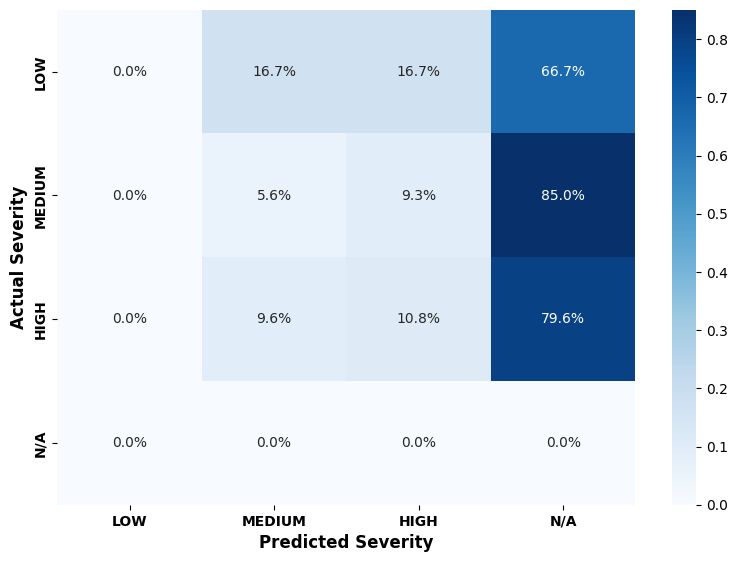

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patheffects import withStroke
from sklearn.metrics import confusion_matrix

classes = ['LOW', 'MEDIUM', 'HIGH', 'N/A']

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)

# Normalize by row (actual classes)
row_sums = cm.sum(axis=1)
cmn = np.zeros_like(cm, dtype=float)

for i in range(len(row_sums)):
    if row_sums[i] > 0:  # Only normalize if row sum is not zero
        cmn[i] = cm[i] / row_sums[i]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cmn,
            annot=True,           # Show values in cells
            fmt='.1%',            # Format as percentage with 1 decimal
            cmap='Blues',       # Choose your preferred colormap
            xticklabels=classes,
            yticklabels=classes,
            cbar=True)           # Remove the color bar

# Add labels and title
plt.ylabel('Actual Severity', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Severity', fontsize=12, fontweight='bold')

# Optional: rotate y-axis labels if needed
plt.yticks(rotation=90)  # Set to other values like 45, 90 if needed

# Make tick labels bold
plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.setp(ax.get_yticklabels(), fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make space for the bottom title

# Save the figure
plt.savefig('horusec_confusion.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [124]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, labels=classes, output_dict=True)
print(classification_report(y_true, y_pred, labels=classes))


              precision    recall  f1-score   support

         LOW       0.00      0.00      0.00        12
      MEDIUM       0.42      0.32      0.37       214
        HIGH       0.35      0.64      0.45       171
    CRITICAL       0.00      0.00      0.00        79

    accuracy                           0.38       476
   macro avg       0.19      0.24      0.21       476
weighted avg       0.32      0.38      0.33       476



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_micro = precision_score(y_true, y_pred, average='micro', labels=classes)
recall_micro = recall_score(y_true, y_pred, average='micro', labels=classes)
f1_micro = f1_score(y_true, y_pred, average='micro', labels=classes)

print(f"Micro Precision: {precision_micro:.2f}")
print(f"Micro Recall:    {recall_micro:.2f}")
print(f"Micro F1-score:  {f1_micro:.2f}")

Micro Precision: 0.27
Micro Recall:    0.27
Micro F1-score:  0.27


# LLM Vulnerability Detection

In [32]:
# @title Prompt Section
prompt = """
You are a security specialist tasked with identifying vulnerabilities in code files. Analyse the provided file and report any Common Weakness Enumerations (CWEs) found.

## Instructions:
- For vulnerable files: List all CWE identifiers in the output section between triple backticks.
- For secure files: Add only triple backticks with no content between them.
- Only one output between triple backticks, no explanation after that.
- Again, provide only the requested output format with no additional explanation.


I am going to give you two examples for you to understand how you should proceed; however, the code can include any logic and not necessarily SQL queries.
## Example 1: Vulnerable File
def login():
    username = request.form['username']
    password = request.form['password']

    # SQL Injection vulnerability
    query = "SELECT * FROM users WHERE username = '{{}}' AND password = '{{}}'".format(username, password)
    cursor.execute(query)

    # Hard-coded credentials
    app.secret_key = "hardcoded_secret_key_1234"

Output:
```
CWE-89
CWE-798
```

## Example 2: Non-Vulnerable File
def login():
    username = request.form.get('username', '')
    password = request.form.get('password', '')

    # Parameterized query prevents SQL injection
    cursor.execute("SELECT * FROM users WHERE username = ?", (username,))

    # Secure random key
    app.config['SECRET_KEY'] = secrets.token_hex(32)

Output:
```
```

File to Assess:
{file_content}

Your security assessment output (CWE IDs only):

"""

In [33]:
!pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.0 MB/s eta 0:00:00


In [34]:
import os

# L account
# os.environ["TOGETHER_API_KEY"] = "06c1fca4c6e0919099dd8c864fc647e9de59eeac1a57b7b685166b94205bb94f"

# P account
os.environ["TOGETHER_API_KEY"] = "7c5b8159540e2bab552b3d40e5cf0ab51174975b537a80bbe6d31f3b67d14977"

## 00
os.environ["TOGETHER_API_KEY"] = "92b6db7eb62f3956636913d73ec4379c3394e57d304818ef66543436bdcb2e04"


In [35]:
# @title Model
from together import Together

def model_inference(prompt):
  client = Together() # auth defaults to os.environ.get("TOGETHER_API_KEY")

  response = client.chat.completions.create(
      model="Qwen/Qwen2.5-Coder-32B-Instruct",
      messages=[
        {
          "role": "user",
          "content": prompt
        }
      ],
      max_tokens=512
  )
  # print(response.choices[0].message.content)
  return response.choices[0].message.content

In [36]:
cve_examples = list(transformed_semgrep.keys())

In [37]:
print(cve_examples[2])

Calendarinho/c77defe


In [38]:
os.listdir("Calendarinho/c77defe/files")

['authentication.py']

In [39]:
!mkdir LLM_output

In [40]:
def create_directories_to_hold_LLM_output():
  for ex in cve_examples:
    os.makedirs(f"LLM_output/{ex}", exist_ok=True)
create_directories_to_hold_LLM_output()

In [41]:
import time
import chardet


def LLM_pipeline(examples_processed_by_LLM, unhandled_examples):
  i = 0
  examples_processed = examples_processed_by_LLM
  unhandled_example = []
  for ex in cve_examples:
    # print(f"{ex}/files")
    if (ex in examples_processed or ex in unhandled_examples):
      continue
    print(f"{ex}/files")
    files = os.listdir(f"{ex}/files")
    # print(files)
    for file in files:
        with open(f"{ex}/files/{file}", 'rb') as raw_file:
            raw_content = raw_file.read()
            result = chardet.detect(raw_content)
            encoding = result['encoding'] or 'latin-1'  # Use latin-1 as fallback

        # Read the file with detected encoding
        file_content = raw_content.decode(encoding)
        # print(file_content)
        prompt_with_file = prompt.format(file_content=file_content)
        # print(prompt_with_file)
        try:
          output = model_inference(prompt_with_file)
        except Exception as e:
          print(e)
          unhandled_examples.append(ex)
          return examples_processed, unhandled_examples
        # print(output)
        with open(f"LLM_output/{ex}/{file.replace('.py', '.txt')}", 'w') as f2:
          f2.write(output)
        # time.sleep(60)
    i += 1
    examples_processed.append(ex)
    # if (i == 5):
    #   break

  return examples_processed, unhandled_examples


examples_processed_by_LLM, unhandled_examples = LLM_pipeline(examples_processed_by_LLM, unhandled_examples)

NameError: name 'examples_processed_by_LLM' is not defined

In [ ]:
import time
import os
import chardet
import tiktoken  # For token counting
from typing import List
import re

def count_tokens(text: str) -> int:
    """Approximate token count using tiktoken."""
    try:
        encoding = tiktoken.encoding_for_model("gpt-4")  # Use gpt-4 encoding as approximation
        return len(encoding.encode(text))
    except:
        # Fallback if tiktoken fails
        # Rough approximation: ~4 chars per token
        return len(text) // 4

def chunk_text(text: str, max_tokens: int = 30000) -> List[str]:
    """Split text into chunks that respect token limits."""
    tokens = count_tokens(text)

    if tokens <= max_tokens:
        return [text]

    # Estimate chars per token for this specific text
    chars_per_token = len(text) / tokens

    # Chunk size in characters
    chunk_chars = int(max_tokens * chars_per_token * 0.9)  # 90% to be safe

    # Try to split at newlines first
    chunks = []
    lines = text.split("\n")
    current_chunk = ""

    for line in lines:
        if count_tokens(current_chunk + line + "\n") > max_tokens:
            if current_chunk:
                chunks.append(current_chunk)
                current_chunk = line + "\n"
            else:
                # Line itself is too long, need to split it
                words = line.split(" ")
                for word in words:
                    if count_tokens(current_chunk + word + " ") > max_tokens:
                        chunks.append(current_chunk)
                        current_chunk = word + " "
                    else:
                        current_chunk += word + " "
                current_chunk += "\n"
        else:
            current_chunk += line + "\n"

    if current_chunk:
        chunks.append(current_chunk)

    return chunks

def model_inference(prompt):
    # Your existing model_inference function
    client = Together()

    # Check token count
    tokens = count_tokens(prompt)
    if tokens > 32000:  # Leave some room for the model's response
        raise ValueError(f"Prompt too long: {tokens} tokens exceed the 32000 token limit.")

    response = client.chat.completions.create(
        model="Qwen/Qwen2.5-Coder-32B-Instruct",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ],
        max_tokens=512
    )
    return response.choices[0].message.content

def LLM_pipeline(examples_processed_by_LLM, unhandled_examples):
    i = 0
    examples_processed = examples_processed_by_LLM
    unhandled_example = []

    for ex in cve_examples:
        # Skip already processed examples
        if (ex in examples_processed or ex in unhandled_examples):
            continue
        print(f"{ex}/files")

        # Create output directory if it doesn't exist
        os.makedirs(f"LLM_output/{ex}", exist_ok=True)

        files = os.listdir(f"{ex}/files")
        for file in files:
            try:
                # Detect file encoding
                with open(f"{ex}/files/{file}", 'rb') as raw_file:
                    raw_content = raw_file.read()
                    result = chardet.detect(raw_content)
                    encoding = result['encoding'] or 'latin-1'  # Use latin-1 as fallback

                # Read the file with detected encoding
                file_content = raw_content.decode(encoding)

                # Process the file in chunks if it's too large
                chunks = chunk_text(file_content, max_tokens=25000)  # Leave room for prompt template
                all_outputs = []

                for idx, chunk in enumerate(chunks):
                    chunk_prompt = prompt.format(file_content=chunk)
                    # chunk_prompt = f"[CHUNK {idx+1}/{len(chunks)}] {chunk_prompt}"
                    # if len(chunks) > 1:
                    #     chunk_prompt += "\nNote: This is part of a larger file that has been split into chunks. Please analyze this chunk independently."

                    try:
                        output = model_inference(chunk_prompt)
                        all_outputs.append(output)
                        print(f"Processed chunk {idx+1}/{len(chunks)} for {ex}/{file}")
                        # Add a small delay to avoid rate limits
                        time.sleep(2)
                    except Exception as e:
                        print(f"Error processing chunk {idx+1} of {ex}/{file}: {e}")
                        return examples_processed, unhandled_examples
                        # Continue with other chunks even if one fails

                # Combine all outputs
                if all_outputs:
                    combined_output = "\n\n===== CHUNK SEPARATOR =====\n\n".join(all_outputs)
                    # Save the combined output
                    with open(f"LLM_output/{ex}/{file.replace('.py', '.txt')}", 'w', encoding='utf-8') as f2:
                        f2.write(combined_output)
                else:
                    # If all chunks failed, mark as unhandled
                    print(f"All chunks failed for {ex}/{file}")
                    if ex not in unhandled_examples:
                        unhandled_examples.append(ex)

            except Exception as e:
                print(f"Error with file {ex}/{file}: {e}")
                if ex not in unhandled_examples:
                    unhandled_examples.append(ex)
                continue

        # Mark example as processed if at least some files were processed
        i += 1
        examples_processed.append(ex)
        # if (i == 5):
        #   break

    return examples_processed, unhandled_examples

# Modified call with try-except to handle errors gracefully
try:
    examples_processed_by_LLM, unhandled_examples = LLM_pipeline(examples_processed_by_LLM, unhandled_examples)
except Exception as e:
    print(f"Pipeline execution failed: {e}")

In [ ]:
# examples_processed_by_LLM = []
# unhandled_examples = []

In [ ]:
# unhandled_examples = ["bottle/6d7e13d"]
print(unhandled_examples)

In [ ]:
print(len(examples_processed_by_LLM))

In [ ]:
import json
with open("examples_processed_by_LLM.json", 'w') as f:
  json.dump(examples_processed_by_LLM, f);

In [ ]:
with open("examples_processed_by_LLM.json", 'r') as f:
  lll = json.load(f)

In [ ]:
import json
with open("unhandled_examples.json", 'w') as f:
  json.dump(unhandled_examples, f);

In [ ]:
print(examples_processed_by_LLM)